<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/onleague_stats_w6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Hypothesis tests and ml with R

**Objectives**

- Review hypothesis tests for proportions and means
- Review hypothesis tests for regression models
- Review hypothesis tests for logistic regression
- Introduce machine learning models with the `caret` package

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
#random binomial data -- 100 trials of 20 coin tosses with p = .3
x <- rbinom(100, 20, 0.3)

In [5]:
x

[1]  4  3  6  4  5  6  7  3  4  4  5  3  5  5  7  6  5  9  9  9  7  7  8  3  6
 [26] 10  8  8  7  9 10  7  8  4  4  5  6  7  5  5  7  6  7  4  3  4 10  6  8  4
 [51]  4  5  3  7  4  9  4  9  4  7  4  7  6  7  4  8  5  5  6  6 10  5  7  5  6
 [76]  6  9  5 10  4  7  4  5 10  7  7  3  6  7  4  3  7  7  6  8  4  4  6 10  6

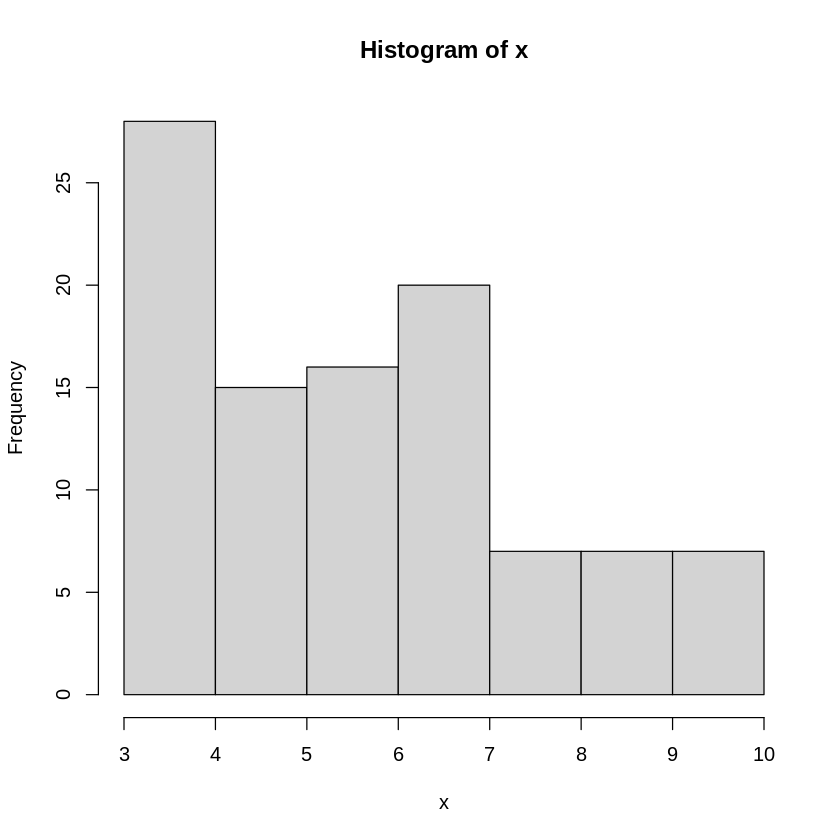

In [4]:
hist(x)

- Hypotheses for proportions

In [8]:
#test whether proportion is different
prop.test(x=6, n=20, p = 0.5)


	1-sample proportions test with continuity correction

data:  6 out of 20, null probability 0.5
X-squared = 2.45, df = 1, p-value = 0.1175
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.1283909 0.5433071
sample estimates:
  p 
0.3 


- Hypothesis for less than .5

In [10]:
#test less than
prop.test(x=6, n=20, p=0.5, alternative = 'less')


	1-sample proportions test with continuity correction

data:  6 out of 20, null probability 0.5
X-squared = 2.45, df = 1, p-value = 0.05876
alternative hypothesis: true p is less than 0.5
95 percent confidence interval:
 0.0000000 0.5088713
sample estimates:
  p 
0.3 


- Hypothesis test for more than .1

In [12]:
#test more
prop.test(x=6, n=20, p=0.5, alternative = 'greater')


	1-sample proportions test with continuity correction

data:  6 out of 20, null probability 0.5
X-squared = 2.45, df = 1, p-value = 0.9412
alternative hypothesis: true p is greater than 0.5
95 percent confidence interval:
 0.1453628 1.0000000
sample estimates:
  p 
0.3 


Create two datasets `class_a` and `class_b` from random normal distributions with $\mu = 80, 83$ and $\sigma = 6, 7$.

In [14]:
class_a <- rnorm(100, mean=80, sd=6)
class_b <- rnorm(100, mean=83, sd=7)

- test for `class_a` that $\mu = 90$

In [23]:
t.test(class_a, mu=90)


	One Sample t-test

data:  class_a
t = -16.378, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 90
95 percent confidence interval:
 77.73757 80.38769
sample estimates:
mean of x 
 79.06263 


- test for `class_a` that $\mu < 90$

In [24]:
t.test(class_a, mu=90, alternative = 'less')


	One Sample t-test

data:  class_a
t = -16.378, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is less than 90
95 percent confidence interval:
     -Inf 80.17144
sample estimates:
mean of x 
 79.06263 


In [25]:
t.test(class_a, mu=90, alternative = 'greater')


	One Sample t-test

data:  class_a
t = -16.378, df = 99, p-value = 1
alternative hypothesis: true mean is greater than 90
95 percent confidence interval:
 77.95382      Inf
sample estimates:
mean of x 
 79.06263 


- test that `class_a` is different than `class_b`

In [26]:
t.test(class_a, class_b)


	Welch Two Sample t-test

data:  class_a and class_b
t = -4.7688, df = 197.86, p-value = 3.588e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.282915 -2.606804
sample estimates:
mean of x mean of y 
 79.06263  83.50749 


- test that `class_a` is greater than `class_b`

In [27]:
t.test(class_a, class_b, alternative = 'greater')


	Welch Two Sample t-test

data:  class_a and class_b
t = -4.7688, df = 197.86, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -5.985181       Inf
sample estimates:
mean of x mean of y 
 79.06263  83.50749 


In [28]:
t.test(class_a, class_b, alternative = 'less')


	Welch Two Sample t-test

data:  class_a and class_b
t = -4.7688, df = 197.86, p-value = 1.794e-06
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.904538
sample estimates:
mean of x mean of y 
 79.06263  83.50749 


Load in the `loan_approval` data.  Set up and carry out a one sample and two sample test of proportions and means.  Interpret the results.

In [29]:
loans <- read_csv('loan_approval.csv')
head(loans)

Rows: 614 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Pro...
dbl (5): ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LP001002,Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


In [54]:
?prop.test

In [59]:
table(loans$Gender,loans$Loan_Status)

        
           N   Y
  Female  37  75
  Male   150 339

In [60]:
prop.test(x = 75, n = 75+37, p = 0.5)


	1-sample proportions test with continuity correction

data:  75 out of 75 + 37, null probability 0.5
X-squared = 12.223, df = 1, p-value = 0.000472
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.5735873 0.7538814
sample estimates:
        p 
0.6696429 


In [61]:
prop.test(x = 75, n = 75+37, p = 0.5, alternative = 'greater')


	1-sample proportions test with continuity correction

data:  75 out of 75 + 37, null probability 0.5
X-squared = 12.223, df = 1, p-value = 0.000236
alternative hypothesis: true p is greater than 0.5
95 percent confidence interval:
 0.5886991 1.0000000
sample estimates:
        p 
0.6696429 


In [62]:
prop.test(~Loan_Status, data=loans, success="Y")

ERROR: ignored

In [63]:
t_test_income <- t.test(loans$ApplicantIncome, mu = 5000)
print(t_test_income)


	One Sample t-test

data:  loans$ApplicantIncome
t = 1.6365, df = 613, p-value = 0.1023
alternative hypothesis: true mean is not equal to 5000
95 percent confidence interval:
 4919.292 5887.626
sample estimates:
mean of x 
 5403.459 



In [64]:
t.test(loans$ApplicantIncome, mu = 5000, alternative = 'greater')


	One Sample t-test

data:  loans$ApplicantIncome
t = 1.6365, df = 613, p-value = 0.05113
alternative hypothesis: true mean is greater than 5000
95 percent confidence interval:
 4997.322      Inf
sample estimates:
mean of x 
 5403.459 


In [65]:
t.test(loans$ApplicantIncome[loans$Loan_Status == "Y"], loans$ApplicantIncome[loans$Loan_Status == "N"])


	Welch Two Sample t-test

data:  loans$ApplicantIncome[loans$Loan_Status == "Y"] and loans$ApplicantIncome[loans$Loan_Status == "N"]
t = -0.10945, df = 320.07, p-value = 0.9129
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1176.660  1052.641
sample estimates:
mean of x mean of y 
 5384.069  5446.078 


In [66]:
t.test(ApplicantIncome ~ Loan_Status, data=loans)


	Welch Two Sample t-test

data:  ApplicantIncome by Loan_Status
t = 0.10945, df = 320.07, p-value = 0.9129
alternative hypothesis: true difference in means between group N and group Y is not equal to 0
95 percent confidence interval:
 -1052.641  1176.660
sample estimates:
mean in group N mean in group Y 
       5446.078        5384.069 


In [45]:
# Two sample t-test
t_test_gender_income <- t.test(loans$ApplicantIncome[loans$Gender == "Male"], loans$ApplicantIncome[loans$Gender == "Female"])

print(t_test_gender_income)


	Welch Two Sample t-test

data:  loans$ApplicantIncome[loans$Gender == "Male"] and loans$ApplicantIncome[loans$Gender == "Female"]
t = 1.8277, df = 283.92, p-value = 0.06865
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  -61.80394 1667.77776
sample estimates:
mean of x mean of y 
 5446.460  4643.473 



In [67]:
loans %>%
  group_by(Loan_Status) %>%
  summarise(mean(ApplicantIncome))

Loan_Status,mean(ApplicantIncome)
<chr>,<dbl>
N,5446.078
Y,5384.069


#### Regression

In [70]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [ ]:
#carat vs. price


In [71]:
#regression model
regression_model <- lm(price ~ carat, data =  diamonds)

In [72]:
#hypothesis test
summary(regression_model)


Call:
lm(formula = price ~ carat, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-18585.3   -804.8    -18.9    537.4  12731.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2256.36      13.06  -172.8   <2e-16 ***
carat        7756.43      14.07   551.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1549 on 53938 degrees of freedom
Multiple R-squared:  0.8493,	Adjusted R-squared:  0.8493 
F-statistic: 3.041e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


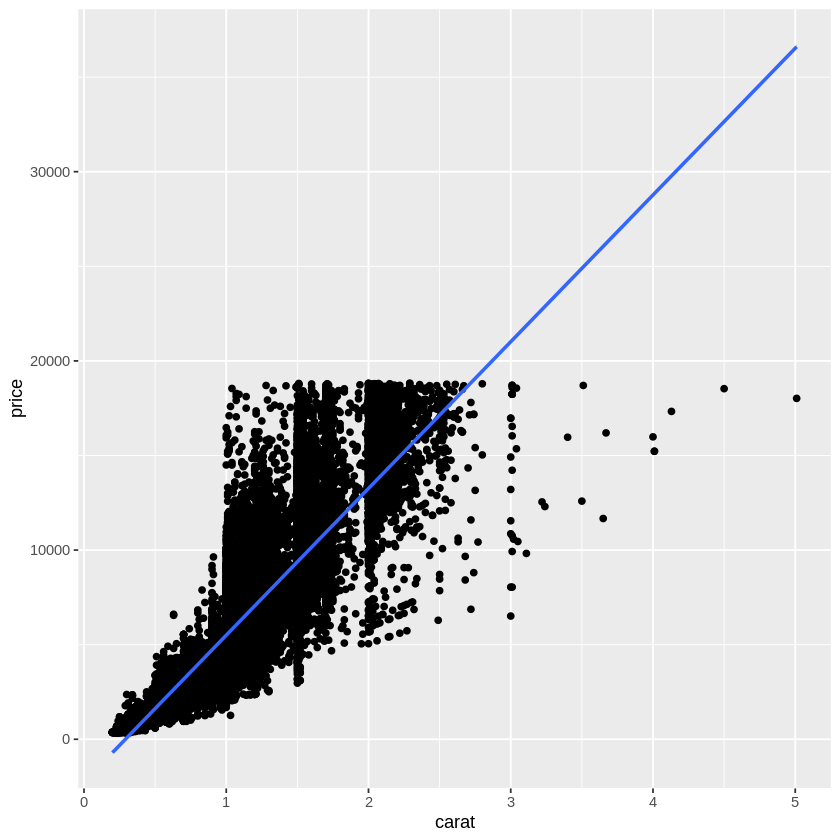

In [74]:
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point() +
    geom_smooth(method = 'lm')

In [75]:
regression_model <- lm(price ~ 0 + carat, data =  diamonds)
summary(regression_model)


Call:
lm(formula = price ~ 0 + carat, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-10486.8  -1473.9  -1136.2   -674.9  12649.1 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
carat 5666.270      8.955   632.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1930 on 53939 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8813 
F-statistic: 4.004e+05 on 1 and 53939 DF,  p-value: < 2.2e-16


In [73]:
?lm

Subset to Ideal and Fair cut, use carat to predict with logistic model.

In [77]:
#subset the data
diamonds %>%
  filter(cut %in% c('Ideal', 'Fair'))

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
0.33,Ideal,I,SI2,61.2,56.0,403,4.49,4.50,2.75
0.33,Ideal,J,SI1,61.1,56.0,403,4.49,4.55,2.76
0.23,Ideal,G,VS1,61.9,54.0,404,3.93,3.95,2.44


In [78]:
#build model
log_reg_diamond <- diamonds %>%
  filter(cut %in% c('Ideal', 'Fair'))

In [80]:
#examine results
lgr_model <- glm(cut ~ carat, data=log_reg_diamond, family='binomial')

In [81]:
summary(lgr_model)


Call:
glm(formula = cut ~ carat, family = "binomial", data = log_reg_diamond)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.70507    0.05341   69.37   <2e-16 ***
carat       -1.30101    0.04709  -27.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11691  on 23160  degrees of freedom
Residual deviance: 10976  on 23159  degrees of freedom
AIC: 10980

Number of Fisher Scoring iterations: 5


Return to the `loan_approval` data.  Build a logistic model and discuss the results of hypothesis tests on your features.

In [85]:
loans$loan_status_3 <- ifelse(loans$Loan_Status == 'Y',1, 0)

In [86]:
lgr_loans <- glm(loan_status_3 ~ ApplicantIncome, data=loans, family='binomial')

In [87]:
summary(lgr_loans)


Call:
glm(formula = loan_status_3 ~ ApplicantIncome, family = "binomial", 
    data = loans)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      7.964e-01  1.159e-01   6.873  6.3e-12 ***
ApplicantIncome -1.645e-06  1.410e-05  -0.117    0.907    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 762.89  on 613  degrees of freedom
Residual deviance: 762.88  on 612  degrees of freedom
AIC: 766.88

Number of Fisher Scoring iterations: 4


#### Machine Learning with R

Using the [caret](https://topepo.github.io/caret/) package.

- Create data split
- Cross validation
- Model building

In [68]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [69]:
install.packages('mlbench')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

